# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive 

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Your code here
#data = pd.read_csv('./data_all.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iron_Hack/ML_CLASS/data_ml/data_all.csv')
data.head()

,e,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
caracter = data.e.unique()

In [4]:
caracter

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

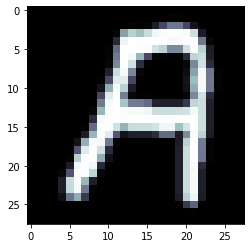

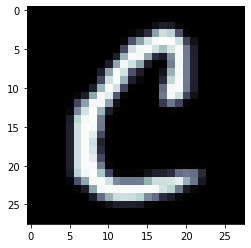

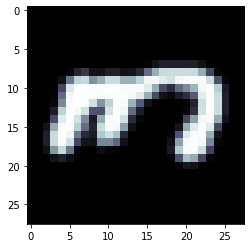

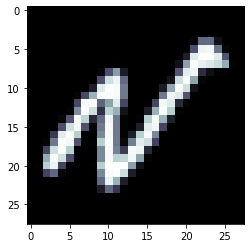

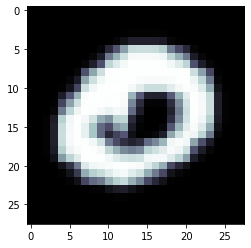

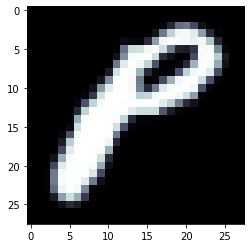

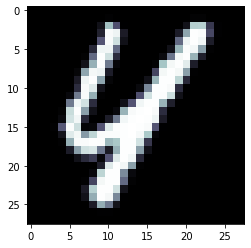

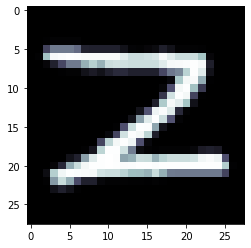

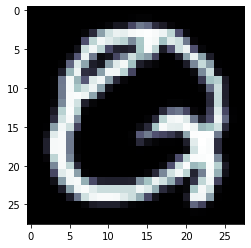

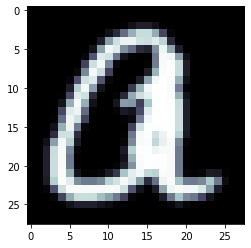

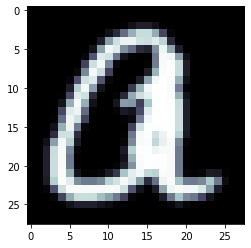

In [5]:
for i in [10,12,22,23,24,25,34,35,26,36,36]:
    fig, ax = plt.subplots()
    ax.imshow(np.asarray(data[data.e==int(i)].iloc[0,1:]).reshape(28,28), cmap=plt.cm.bone, interpolation='nearest') 
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

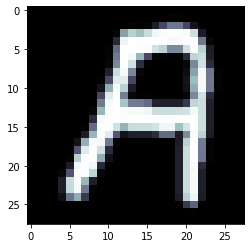

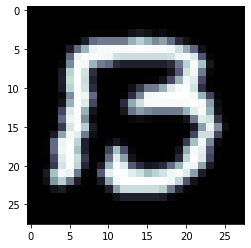

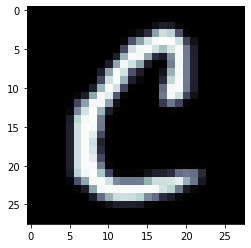

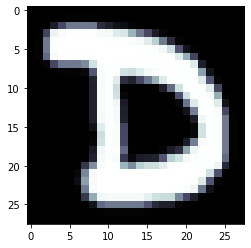

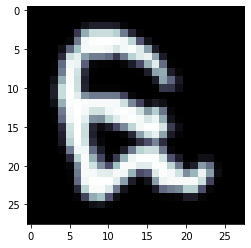

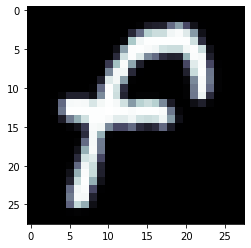

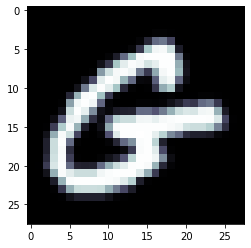

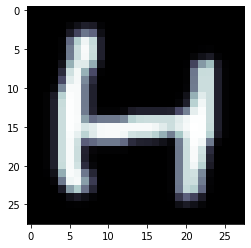

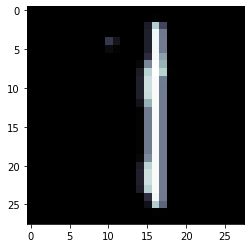

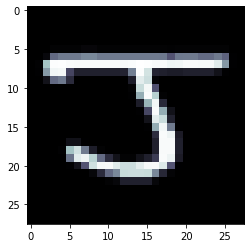

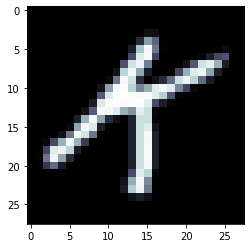

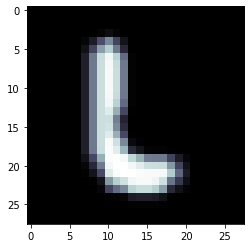

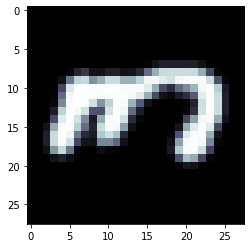

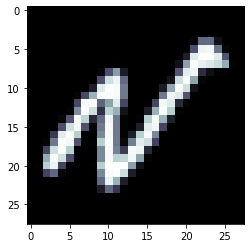

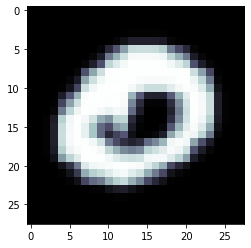

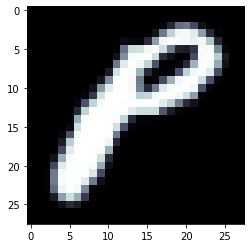

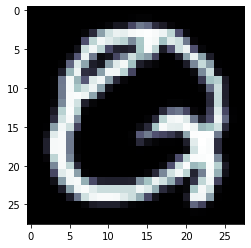

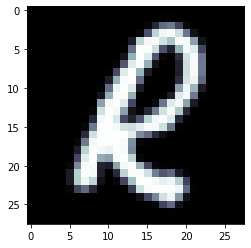

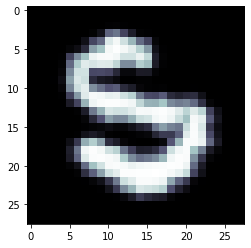

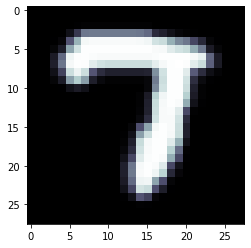

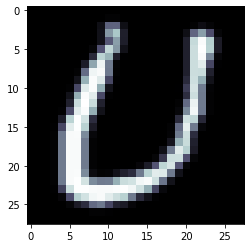

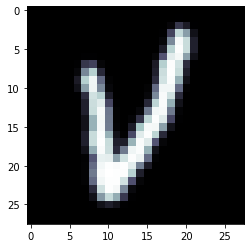

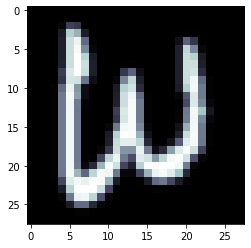

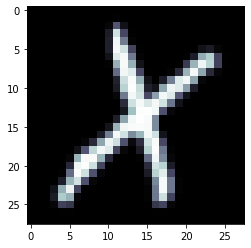

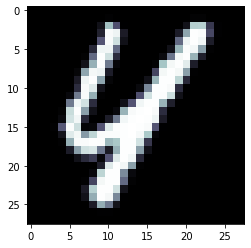

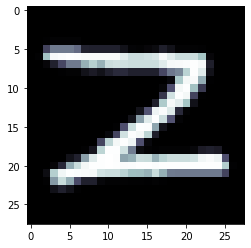

In [6]:
for i in range(10,36):
    fig, ax = plt.subplots()
    ax.imshow(np.asarray(data[data.e==int(i)].iloc[0,1:]).reshape(28,28), cmap=plt.cm.bone, interpolation='nearest') 
    

In [7]:
print('According to the visualization, the values from 0 to 9 are numbers and the values from 1 to 35 are uppercase and the rest of the values in column e are lowercase.')

According to the visualization, the values from 0 to 9 are numbers and the values from 1 to 35 are uppercase and the rest of the values in column e are lowercase.


In [8]:
# due to the number of columns use a PCA algorithm to reduce dimensionality
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = data.iloc[:,1:]

#scaler_data = StandardScaler()
#scaler_data.fit(X)

pca_data = PCA(n_components=10)
pca_data.fit(np.array(X))

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
X.shape 

(116322, 784)

In [10]:
pca_x = pca_data.transform(np.array(X))


In [11]:
print(pca_x.shape)
Y=data.loc[:,'e']
print(Y.shape)

df = pd.concat([Y,pd.DataFrame(pca_x)],axis=1)
#from statsmodels.multivariate.pca import PCA
#pca = PCA(np.array(np.array(X.dropna())),ncomp=10)

df.isna().sum()

(116322, 10)
(116322,)


e    0
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [12]:
# 0 - numbers,lower
# 1 - letter uppercase

from sklearn.model_selection import train_test_split

df['upper'] = df.e.apply(lambda s: 1 if int(s) > 9 and int(s) <= 35 else 0)

x = df[df['upper']==1].iloc[:,1:-1]
y = df.loc[:,'e'][df['upper']==1]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=4)
print(x.shape,y.shape)


(31345, 10) (31345,)


In [13]:
# Your code here
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=41)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=41, splitter='best')

In [14]:
model.score(X_test,y_test)

0.6359866007337693

In [15]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.svm import SVC
model_svm = SVC(random_state=42)
model_svm.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
model_svm.score(X_test,y_test)

0.848779709682565

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_logis = LogisticRegression(solver='lbfgs', max_iter=5000,multi_class='multinomial')
model_logis.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model_logis.score(X_test,y_test)

0.6447599298133674

In [19]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
model_bayes = GaussianNB()


In [20]:
model_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
model_bayes.score(X_test,y_test)

0.6237039400223321

In [22]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
forest.score(X_test,y_test)

0.45158717498803636

In [24]:
# K NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=20,weights='distance')

In [25]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.823097782740469

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

models = [DecisionTreeClassifier(random_state=42),LogisticRegression(multi_class='multinomial',random_state=42,max_iter=5000),
          RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0),KNeighborsClassifier(n_neighbors=20,weights='distance'),
          GaussianNB(),SVC(random_state=42)]

def classifier_models(X_train,X_test,y_train,y_test,models):
    model_name = ['Decision Tree Classifier','Logistic Regression Multinomial','Random Forest Classifier','KNeighborsClassifier','NaiveBayes Gaussian','Suport Vector Machine']
    scores_models = []
    train_models = []
    for cls in models:
        model = cls

        training_model = model.fit(X_train,y_train)
        train_models.append(training_model)
    
        score = training_model.score(X_test,y_test)
        scores_models.append(score)

    return dict(zip(model_name,scores_models))


score_by_model = classifier_models(X_train,X_test,y_train,y_test,models)

In [27]:
print('Prediction score  of uppercase by model:\n')
for i,(m,s) in enumerate(score_by_model.items()):
    print('-------'*10)
    print('| Model:', m,'|','Score:',s)


Prediction score  of uppercase by model:

----------------------------------------------------------------------
| Model: Decision Tree Classifier | Score: 0.6141330355718615
----------------------------------------------------------------------
| Model: Logistic Regression Multinomial | Score: 0.6350295102887222
----------------------------------------------------------------------
| Model: Random Forest Classifier | Score: 0.4402616047216462
----------------------------------------------------------------------
| Model: KNeighborsClassifier | Score: 0.8108151220290317
----------------------------------------------------------------------
| Model: NaiveBayes Gaussian | Score: 0.6165257616844791
----------------------------------------------------------------------
| Model: Suport Vector Machine | Score: 0.8443132876056787


In [28]:
score_by_model.items()

dict_items([('Decision Tree Classifier', 0.6141330355718615), ('Logistic Regression Multinomial', 0.6350295102887222), ('Random Forest Classifier', 0.4402616047216462), ('KNeighborsClassifier', 0.8108151220290317), ('NaiveBayes Gaussian', 0.6165257616844791), ('Suport Vector Machine', 0.8443132876056787)])

* Try to do the same thing with lowercases.

In [29]:
# Your code here
# 0 - numbers,upper
# 1 - letter lower

df['lower'] = df.e.apply(lambda s: 1 if int(s) > 35 else 0)

x = df[df['lower']==1].iloc[:,1:-2]
y = df.loc[:,'e'][df['lower']==1]
print(x.shape,y.shape)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

score_by_model = classifier_models(X_train,X_test,y_train,y_test,models)


(27059, 10) (27059,)


In [30]:
print('Prediction score  of lowercase by model:\n')
for i,(m,s) in enumerate(score_by_model.items()):
    print('-------'*10)

    print('| Model:', m,'|','Score:',s)

Prediction score  of lowercase by model:

----------------------------------------------------------------------
| Model: Decision Tree Classifier | Score: 0.6409830007390983
----------------------------------------------------------------------
| Model: Logistic Regression Multinomial | Score: 0.6600147819660015
----------------------------------------------------------------------
| Model: Random Forest Classifier | Score: 0.4874353288987435
----------------------------------------------------------------------
| Model: KNeighborsClassifier | Score: 0.8061714708056171
----------------------------------------------------------------------
| Model: NaiveBayes Gaussian | Score: 0.6457871396895787
----------------------------------------------------------------------
| Model: Suport Vector Machine | Score: 0.8379526977087953


* Try to do the same thing with numbers.

In [31]:
# Your code here
# Your code here
# 0 - uppers,lowers
# 1 - numbers

df['number'] = df.e.apply(lambda s: 1 if int(s) >=0 and int(s)<=10 else 0)

x = df[df['number']==1].iloc[:,1:-3]
y = df.loc[:,'e'][df['number']==1]

print(x.shape,y.shape)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

score_by_model = classifier_models(X_train,X_test,y_train,y_test,models)

(58980, 10) (58980,)


In [32]:
print('Prediction score of numbers by model:\n')
for i,(m,s) in enumerate(score_by_model.items()):
    print('-------'*10)
    print('| Model:', m,'|','Score:',s)

Prediction score of numbers by model:

----------------------------------------------------------------------
| Model: Decision Tree Classifier | Score: 0.8302249350062167
----------------------------------------------------------------------
| Model: Logistic Regression Multinomial | Score: 0.8179043743641913
----------------------------------------------------------------------
| Model: Random Forest Classifier | Score: 0.7059455182547756
----------------------------------------------------------------------
| Model: KNeighborsClassifier | Score: 0.9429750197807166
----------------------------------------------------------------------
| Model: NaiveBayes Gaussian | Score: 0.7993670170679327
----------------------------------------------------------------------
| Model: Suport Vector Machine | Score: 0.9504916920990166
